<a href="https://colab.research.google.com/github/nonu0/Object-detection/blob/master/computer_vision_Torchvision_GPU_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import requests
from torch import nn
from pathlib import Path
import torchvision
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from timeit import default_timer as timer
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download=True 
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download=True 
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(test_dataset),len(train_dataset)

(10000, 60000)

In [ ]:
label_names = train_dataset.classes
train_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image,label = train_dataset[0]
label_names[label]

'Ankle boot'

Text(0.5, 1.0, 'Ankle boot')

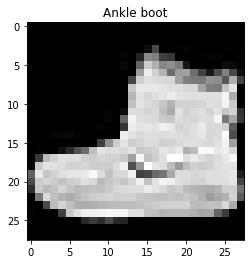

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(label_names[label])

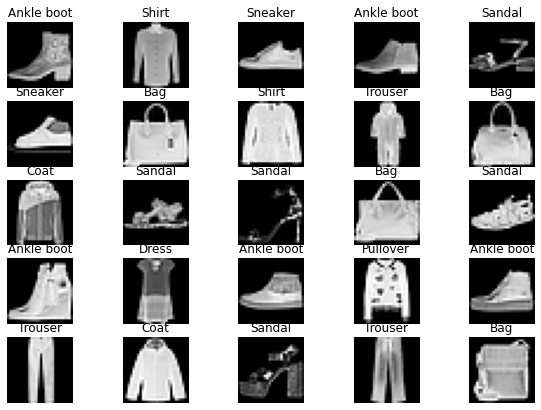

In [ ]:
fig = plt.figure(figsize=(10,7))
cols,rows = 5,5
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_dataset),size=(1,)).item()
    image,label = train_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(label_names[label])
    plt.axis(False)

In [ ]:
# device =if "cuda" is_available() else "cpu"

In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,)

test_dataloader = DataLoader(test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,)


In [ ]:
class FashionMNISTModel(nn.Module):
    def __init__(self,input_features:int,hidden_units:int,output_features:int):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),   
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features),
        )

    def forward(self,x):
        network = self.linear_relu_stack(x)
        return network

model = FashionMNISTModel(input_features=784,hidden_units=50,output_features=len(label_names))
model

FashionMNISTModel(
  (linear_relu_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [ ]:
if Path("helpper_functions.py").is_file():
    print("file already exusts")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    print("Downloading...")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

Downloading...


In [ ]:
from helper_functions import accuracy_fn,print_train_time

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [ ]:
# torch.manual_seed(42)
# epochs = 3

# for epoch in tqdm(range(epochs)):
#     #Train
#     train_loss = 0
#     for batch,(X_train,y_train) in enumerate(train_dataloader):
#         model.train()

#         train_preds = model(X_train)

#         loss = loss_fn(train_preds,y_train)
#         train_loss += loss

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step() 

#         if batch % 400 == 0:
#             print(f"looked at {batch*len(X_train)}/{len(train_dataloader.dataset)} samples")

#     train_loss /= len(train_dataloader)

#     test_loss,test_acc = 0,0
#     model.eval()
#     with torch.inference_mode():
#         for X_test,y_test in test_dataloader:
#             test_preds = model(X_test)

#             test_loss += loss_fn(test_preds,y_test)
#             test_acc += accuracy_fn(y_true=y_test,y_pred=test_preds.argmax(dim=1))

#             # test loss per batch
#             test_loss/=len(test_dataloader)

#         print(f"\nTrain loss:{train_loss} | test loss:{test_loss:.3f} | test accuracy: {test_acc}")
        


In [ ]:
from torchvision.datasets.vision import data
def training(dataloader,model,loss_fn,optimizer):
    size = len(dataloader.dataset)
    train_loss,train_acc =0,0
    model.train()

    for batch,(X,y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred,y)
        train_acc += accuracy_fn(y_true=y,y_pred=pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch*len(X)}/{size}")


    loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"train loss:{loss} train accuracy: {train_acc:.2f}%" )

def testing(dataloader,model,loss_fn):
    size = len(dataloader.dataset)
    num_batch = len(dataloader)
    model.eval()

    test_loss,test_acc = 0,0

    with torch.inference_mode():
        for X,y in dataloader:
            pred = model(X)

            test_loss += loss_fn(pred,y)
            test_acc += accuracy_fn(y_true=y,y_pred=pred.argmax(dim=1))
        test_acc /= num_batch
        test_loss /=  num_batch

    print(f"\ntest loss:{test_loss:.3f} | test accuracy: {test_acc:.2f}%")


In [ ]:
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}")
    training(train_dataloader,model,loss_fn,optimizer)
    testing(test_dataloader,model,loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:9.298515215050429e-05 train accuracy: 79.43%

test loss:0.448 | test accuracy: 83.74%
Epoch : 1
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:0.00022900915064383298 train accuracy: 84.79%

test loss:0.430 | test accuracy: 84.21%
Epoch : 2
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:9.162181959254667e-05 train accuracy: 86.13%

test loss:0.411 | test accuracy: 84.84%
Epoch : 3
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:0.00022720449487678707 train accuracy: 86.89%

test loss:0.404 | test accuracy: 85.61%
Epoch : 4
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:0.00015512037498410

##CNN

torch.Size([1, 28, 28])

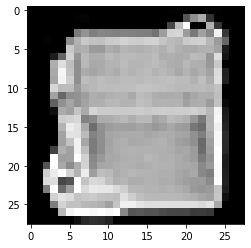

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
image.shape

In [ ]:
class FashionMNISTCNNModel(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self,x):
        # print(f"shape of initial x: {x.shape}")
        x = self.layer_block_1(x)
        # print(f"shape after layer 1: {x.shape}")
        x = self.layer_block_2(x)
        # print(f"shape after layer 2: {x.shape}")
        x = self.classifier(x)
        # print(f"shape after classifier: {x.shape}")

        return x

In [ ]:
model_cnn = FashionMNISTCNNModel(input_shape=1,hidden_units=10,output_shape=len(label_names))


In [ ]:
rand_int = torch.randn([1,28,28])
rand_int.shape

torch.Size([1, 28, 28])

In [ ]:
model_cnn(image.unsqueeze(dim=0))

tensor([[-0.0256,  0.0336,  0.0136, -0.0826, -0.0176, -0.0074,  0.0030, -0.0294,
          0.0361,  0.0245]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(),lr=0.1)

In [ ]:
train_time_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}")
    training(train_dataloader,model_cnn,loss_fn,optimizer)
    testing(test_dataloader,model_cnn,loss_fn)

train_time_end = timer()
total_train_time = print_train_time(train_time_start,train_time_end,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:0.00022436118160840124 train accuracy: 78.05%

test loss:0.392 | test accuracy: 85.46%
Epoch : 1
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:0.0003041307791136205 train accuracy: 87.55%

test loss:0.369 | test accuracy: 86.81%
Epoch : 2
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000
train loss:7.544112304458395e-05 train accuracy: 88.89%

test loss:0.323 | test accuracy: 88.45%

Train time on cpu: 158.471 seconds


#Use the best model to make predictions

In [ ]:
def predictions(model:torch.nn.Module,data:list,device:torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample by adding a batch dimension 
            sample = torch.unsqueeze(sample,dim=0)
            #forward pass
            pred_logits = model_cnn(sample)

            #get pred probability 
            pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_dataset),k=9):
    test_samples.append(sample)
    test_labels.append(label)

len(test_samples)


9

Text(0.5, 1.0, 'T-shirt/top')

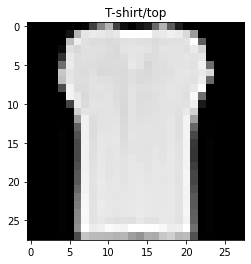

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(label_names[test_labels[0]])

In [ ]:
# Make predictions

pred_probs = predictions(model=model_cnn,data=test_samples)
pred_probs[:1]

tensor([[6.2736e-01, 1.9044e-04, 6.3976e-03, 1.0359e-03, 1.0227e-04, 3.7444e-07,
         3.6402e-01, 2.5648e-07, 8.9189e-04, 2.6648e-08]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 5, 5, 2, 8, 9, 0, 2, 8])

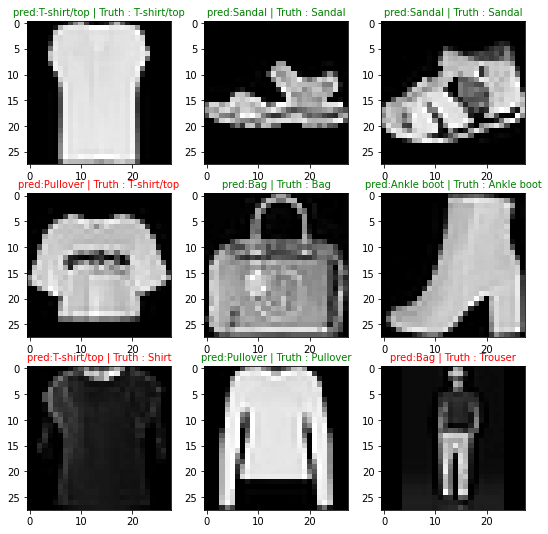

In [ ]:
plt.figure(figsize=(9,9))
nrows,ncols = 3,3
for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap='gray')

    pred_label= label_names[pred_classes[i]]
    truth_label = label_names[test_labels[i]]
    title_text = f"pred:{pred_label} | Truth : {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c='g')

    else:
        plt.title(title_text,fontsize=10,c='r')


#confusion metrics 

In [ ]:
y_preds = []
model_cnn.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="making predictions..."):
        y_logits = model_cnn(X)
        y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred)

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:4]

making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([8, 2, 6, 8])

In [ ]:
len(y_preds_tensor)

10000

In [ ]:
pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try:
    import torchmetrics,mlxtend
    print(f"mlxtend version:{mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]>=19,"mlxtend version should be grater than 0.19.0 or higher")
except:
    !pip install -q torchmetrics, -U mlxtend
    import torchmetrics,mlxtend
    print(f"mlxtend version:{mlxtend.__version__}")

mlxtend version:0.14.0
ERROR: Invalid requirement: 'torchmetrics,'
mlxtend version:0.14.0


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
confmat = ConfusionMatrix(num_classes=len(label_names))
confMatTensor = confmat(preds=y_preds_tensor,target=test_dataset.targets)

In [ ]:
confMatTensor

tensor([[ 58,  94,  93,  97, 124, 110, 113, 114, 104,  93],
        [ 61, 102, 102, 108, 104,  96, 142, 105,  96,  84],
        [ 71,  89, 101, 121, 112,  84, 126, 116,  93,  87],
        [ 72,  94,  95, 139, 116,  83, 103, 123,  94,  81],
        [ 61,  94, 111, 100, 111,  86, 131, 116, 105,  85],
        [ 77,  94,  94, 121, 135,  74, 109, 125,  90,  81],
        [ 64, 105, 104,  96, 118,  85, 134, 117,  84,  93],
        [ 71,  98,  89, 126, 130,  82, 125, 115,  80,  84],
        [ 54,  95, 106, 113, 117, 104, 120, 101, 107,  83],
        [ 72,  88, 100, 121, 110,  94, 125, 115,  83,  92]])

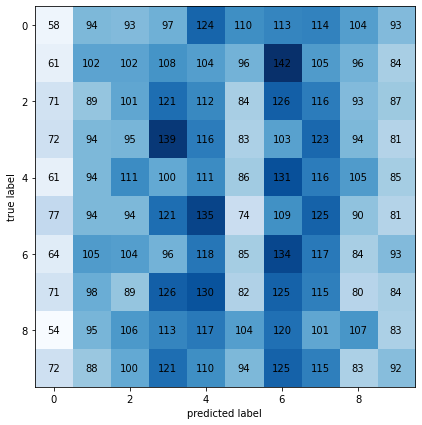

In [ ]:
fig,axis = plot_confusion_matrix(conf_mat=confMatTensor.numpy(),
                                 figsize=(10,7))